# Python Bootcamp Day 4:
## Timeseries & Pandas

Today, we will practice manipulating timeseries data. We will use lidar measurements of wind speeds as our toy dataset. These measurements were gathered off the East coast in an area where companies are planning to build wind turbines. We will use these measurements to answer questions like "what month has the strongest average winds" and "how often are winds so weak that they don't spin the turbine".

### Goals for the day:
- Learn how to read in data from csv files
- Learn how to pre-process and process the data 
    - Learn how to make some simple plots of the data


Reminder:
<br/><font color='blue'>* Blue text indicates activities that you should complete as a student
<br/><font color='red'>* Red text indicates extra challenge questions 

In [1]:
### Import libraries / packages
from datetime import datetime  # for some datetime manipulations
import numpy as np # for data storage and math
import pandas as pd # for data storage and timeseries math
import matplotlib.pyplot as plt # for plotting

# 1. Read in data
Our lidar measurements are saved as `.csv`'s, which stands for Comma Separated Values. You can think of `.csv` files as spreadsheets where data within a row is seperated with a comma. You can double click on `lidar_winds.csv` in the sidebar and glimpse the data. Tabular data shows up all the time in the geosciences, and one place it is especially common is observational timeseries. 

`pandas` is a library that is specifically designed to read and analyze tabular data. We will start off by reading our toy dataset of lidar winds into a `pandas` DataFrame. More on `pandas` tools [here](https://pandas.pydata.org/docs/user_guide/index.html).

In [2]:
### Read tabluar data into a pandas DataFrame
df = pd.read_csv("lidar_winds.csv")

We can get a quick idea of what data inside our DataFrame looks like by looking at the first 5 rows with the `.head()` command.

In [3]:
df.head()

,timestamp,wspd18m,wspd38m,wspd58m,wspd78m,wspd98m,wspd118m,wspd138m,wspd158m,wspd178m,wspd198m
0,08-12-2019 00:00,7.2923,7.6785,7.6968,7.8280,7.8013,7.8933,7.8635,7.8858,7.9044,NaN
1,08-12-2019 00:10,7.8613,8.0330,8.0225,7.9279,7.9980,7.9306,8.1698,8.1405,8.0702,8.0487
2,08-12-2019 00:20,7.7594,7.9883,8.0180,8.1314,8.0906,8.1408,8.1291,8.0939,8.2030,8.1353
3,08-12-2019 00:30,7.4891,7.7554,7.7973,7.9551,7.9063,7.9964,7.9652,8.0749,8.0105,8.0792
4,08-12-2019 00:40,7.8829,8.0248,8.1332,8.1741,7.9927,8.1230,8.0443,8.1074,8.1969,8.1296


and you can look at the end of the DataFram with the `.tail()` command.

In [4]:
df.tail()

,timestamp,wspd18m,wspd38m,wspd58m,wspd78m,wspd98m,wspd118m,wspd138m,wspd158m,wspd178m,wspd198m
84391,03-21-2021 23:10,1.7978,1.9557,2.0617,1.9270,1.3744,1.0722,0.9203,0.9038,0.9421,1.2546
84392,03-21-2021 23:20,2.6771,2.8746,2.8993,2.9530,2.9098,2.6337,2.1869,1.7314,1.5436,1.6571
84393,03-21-2021 23:30,3.2416,3.4077,3.5611,3.5823,3.5930,3.3885,2.9375,2.4509,2.2373,2.2883
84394,03-21-2021 23:40,2.7582,2.9039,3.1269,3.4249,3.5028,3.1862,2.9139,2.7500,2.6825,2.6642
84395,03-21-2021 23:50,2.5452,2.6611,3.0353,3.5475,3.4993,3.3521,3.1904,3.1565,3.2213,3.2293


`df` has 11 **columns**. One has timestamps of wind speed measurements, and the rest are wind speed measurements at heights between 18 m and 198 m above the surface. We can isolate just one column of the DataFrame by using `df["wspd18"]`, for example

In [5]:
df['wspd18m']

0        7.2923
1        7.8613
2        7.7594
3        7.4891
4        7.8829
          ...  
84391    1.7978
84392    2.6771
84393    3.2416
84394    2.7582
84395    2.5452
Name: wspd18m, Length: 84396, dtype: float64

Or, if we want to look at timestamp values, we run

In [6]:
df['timestamp']

0        08-12-2019 00:00
1        08-12-2019 00:10
2        08-12-2019 00:20
3        08-12-2019 00:30
4        08-12-2019 00:40
               ...       
84391    03-21-2021 23:10
84392    03-21-2021 23:20
84393    03-21-2021 23:30
84394    03-21-2021 23:40
84395    03-21-2021 23:50
Name: timestamp, Length: 84396, dtype: object

<font color='blue'> In the cell below, print the 'wspd38m' column in the df DataFrame.

In [7]:
df['wspd38m']

0        7.6785
1        8.0330
2        7.9883
3        7.7554
4        8.0248
          ...  
84391    1.9557
84392    2.8746
84393    3.4077
84394    2.9039
84395    2.6611
Name: wspd38m, Length: 84396, dtype: float64

Let's do a quick plot of the 18m wind speed to see what it looks like (note the x-axis is not intuitive! It would make more sense if it used the dates):

<AxesSubplot:>

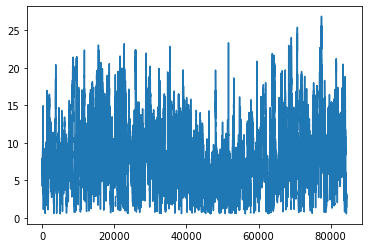

In [8]:
df['wspd18m'].plot()

<font color='red'> In the cell below, make the same plot as above but for the 'wspd38m' column and add labels for the x and y axes.

Text(0, 0.5, 'Wind Speed (m/s)')

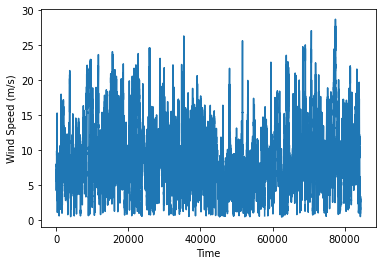

In [9]:
df['wspd38m'].plot()
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')

# 2. Preprocessing

Before doing any sort of analysis (for example, calculating things like average wind speeds), you often need to preprocess data. `pandas` is very powerful at doing timeseries analysis, but in order to do timeseries analysis, we must reformat the data in a way that is friendly to timeseries analysis. We are going to do two things: reformat the data and change the index.

The last row of the above outputs tells us that the data in `wspd18m` is `float64` (a decimal number) and the data in `timestamp` is `object` (which usually means a string). We need to tell `pandas` that the `timestamp` column actually contains timestamps, not just any old regular strings. To do that, we will run the following line

In [10]:
pd.to_datetime(df['timestamp'])

0       2019-08-12 00:00:00
1       2019-08-12 00:10:00
2       2019-08-12 00:20:00
3       2019-08-12 00:30:00
4       2019-08-12 00:40:00
                ...        
84391   2021-03-21 23:10:00
84392   2021-03-21 23:20:00
84393   2021-03-21 23:30:00
84394   2021-03-21 23:40:00
84395   2021-03-21 23:50:00
Name: timestamp, Length: 84396, dtype: datetime64[ns]

You can now see that the `dtype` in the last line is now `datetime64`. In `pd.to_datetime()`, `pandas` reads though all the data and guessts its format. If you know the format ahead of time, you can specify the format and the data conversion will run quicker. For example, the conversion for the above code would read `pd.to_datetime(df['timestamp'], format='%m-%d-%Y %H:%M')`. [More on conversion codes here.](https://strftime.org/)

### Common pitfall
Above, we ran a line of code that converted the timestamp data from `object` format data to `datetime64` formatted data. So, if we rerun `df['timestamp']`, we should see that our data is now `datetime64` data, right?

In [11]:
df['timestamp']

0        08-12-2019 00:00
1        08-12-2019 00:10
2        08-12-2019 00:20
3        08-12-2019 00:30
4        08-12-2019 00:40
               ...       
84391    03-21-2021 23:10
84392    03-21-2021 23:20
84393    03-21-2021 23:30
84394    03-21-2021 23:40
84395    03-21-2021 23:50
Name: timestamp, Length: 84396, dtype: object

But in actuality, it's still the `object` datatype. What gives? 

In `pandas`, **you often need to explicitly state that you want to replace the data in your DataFrame**. In order to replace the data in `timestamp`, run

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

Now, when we look at the data in the `timestamp` column, we see that it is indeed `datetime64`.

In [13]:
df['timestamp']

0       2019-08-12 00:00:00
1       2019-08-12 00:10:00
2       2019-08-12 00:20:00
3       2019-08-12 00:30:00
4       2019-08-12 00:40:00
                ...        
84391   2021-03-21 23:10:00
84392   2021-03-21 23:20:00
84393   2021-03-21 23:30:00
84394   2021-03-21 23:40:00
84395   2021-03-21 23:50:00
Name: timestamp, Length: 84396, dtype: datetime64[ns]

Now that `pandas` knows that we are working with timeseries data, we need to replace the index with these timestamps. In the above code outputs, you see the numbers `0, 1, 2, ...` to the left of all the data, one for every row. This is the **index**. When reading in data via `pd.read_csv()`, we didn't specify the value of the index, so `pandas` set the value of the index to its default value of `0, 1, 2, ...`. We want to replace this default index with the timeseries index. To do this, run `df = df.set_index("<column name>")`.

In [14]:
df = df.set_index('timestamp')

After running this command, we are done preprocessing. You can output the value of `df` and verify that it looks slightly different now than when we started.

In [15]:
df

,wspd18m,wspd38m,wspd58m,wspd78m,wspd98m,wspd118m,wspd138m,wspd158m,wspd178m,wspd198m
timestamp,,,,,,,,,,
2019-08-12 00:00:00,7.2923,7.6785,7.6968,7.8280,7.8013,7.8933,7.8635,7.8858,7.9044,NaN
2019-08-12 00:10:00,7.8613,8.0330,8.0225,7.9279,7.9980,7.9306,8.1698,8.1405,8.0702,8.0487
2019-08-12 00:20:00,7.7594,7.9883,8.0180,8.1314,8.0906,8.1408,8.1291,8.0939,8.2030,8.1353
2019-08-12 00:30:00,7.4891,7.7554,7.7973,7.9551,7.9063,7.9964,7.9652,8.0749,8.0105,8.0792
2019-08-12 00:40:00,7.8829,8.0248,8.1332,8.1741,7.9927,8.1230,8.0443,8.1074,8.1969,8.1296
...,...,...,...,...,...,...,...,...,...,...
2021-03-21 23:10:00,1.7978,1.9557,2.0617,1.9270,1.3744,1.0722,0.9203,0.9038,0.9421,1.2546
2021-03-21 23:20:00,2.6771,2.8746,2.8993,2.9530,2.9098,2.6337,2.1869,1.7314,1.5436,1.6571
2021-03-21 23:30:00,3.2416,3.4077,3.5611,3.5823,3.5930,3.3885,2.9375,2.4509,2.2373,2.2883


Why do we care about `datetime`; isn't the date already in the dataframe? Turns out `Pandas` has certain functionality that only works if the date is formatted correctly. Originally, it was just a string of characters. Let's say we just want to know the month or day of each of our dataset, we can use `.day` or `.month`:

In [16]:
df.index.month, df.index.day

(Int64Index([8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
            dtype='int64', name='timestamp', length=84396),
 Int64Index([12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
             ...
             21, 21, 21, 21, 21, 21, 21, 21, 21, 21],
            dtype='int64', name='timestamp', length=84396))

If we don't convert to datetime, we can't use the full power of `Pandas` (See error below!):

In [17]:
df2 = pd.read_csv("lidar_winds.csv")
df2 = df2.set_index('timestamp')

df2.index.month

AttributeError: 'Index' object has no attribute 'month'

<font color='blue'> Add on to the code in the cell below to look at the datatype of the 'timestamp' column if df3.

In [18]:
df3 = pd.read_csv("lidar_winds.csv")

# Add code here to print 'timestamp'
df3['timestamp']

0        08-12-2019 00:00
1        08-12-2019 00:10
2        08-12-2019 00:20
3        08-12-2019 00:30
4        08-12-2019 00:40
               ...       
84391    03-21-2021 23:10
84392    03-21-2021 23:20
84393    03-21-2021 23:30
84394    03-21-2021 23:40
84395    03-21-2021 23:50
Name: timestamp, Length: 84396, dtype: object

<font color='red'> Convert the timestamp column of df3 from type `object` into type `datetime64` and set the timestamp column as the index like we did above. Print the data by typing `df3` to see if this worked.

In [19]:
df3['timestamp'] = pd.to_datetime(df3['timestamp'])
df3 = df3.set_index('timestamp')
df3

,wspd18m,wspd38m,wspd58m,wspd78m,wspd98m,wspd118m,wspd138m,wspd158m,wspd178m,wspd198m
timestamp,,,,,,,,,,
2019-08-12 00:00:00,7.2923,7.6785,7.6968,7.8280,7.8013,7.8933,7.8635,7.8858,7.9044,NaN
2019-08-12 00:10:00,7.8613,8.0330,8.0225,7.9279,7.9980,7.9306,8.1698,8.1405,8.0702,8.0487
2019-08-12 00:20:00,7.7594,7.9883,8.0180,8.1314,8.0906,8.1408,8.1291,8.0939,8.2030,8.1353
2019-08-12 00:30:00,7.4891,7.7554,7.7973,7.9551,7.9063,7.9964,7.9652,8.0749,8.0105,8.0792
2019-08-12 00:40:00,7.8829,8.0248,8.1332,8.1741,7.9927,8.1230,8.0443,8.1074,8.1969,8.1296
...,...,...,...,...,...,...,...,...,...,...
2021-03-21 23:10:00,1.7978,1.9557,2.0617,1.9270,1.3744,1.0722,0.9203,0.9038,0.9421,1.2546
2021-03-21 23:20:00,2.6771,2.8746,2.8993,2.9530,2.9098,2.6337,2.1869,1.7314,1.5436,1.6571
2021-03-21 23:30:00,3.2416,3.4077,3.5611,3.5823,3.5930,3.3885,2.9375,2.4509,2.2373,2.2883


Let's do that quick plot again of the 18m wind speed to see what it looks like now after changing the index to the timestamp: 

<AxesSubplot:xlabel='timestamp'>

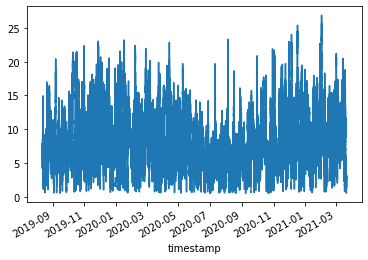

In [20]:
df['wspd18m'].plot()

### By the way: selecting data by row
We earlier isolated data by column. We can also isolate data by row. There are two ways to do this, by "position" and by "row value". If you want to access the data in the 3rd row by "position", run `df.iloc[2]` (remember Python's zero-indexing). If you want to access data by "value", run `df.loc[datetime(2019, 8, 12, 0, 20)]`. We need to be verbose and state `datetime(2019, 8, 12, 0, 20)` because our data is the `datetime64` data type.

In [21]:
df.iloc[20]

wspd18m     7.0827
wspd38m     7.1664
wspd58m     7.1680
wspd78m     7.2605
wspd98m     7.3490
wspd118m    7.3269
wspd138m    7.3430
wspd158m    7.3944
wspd178m    7.2722
wspd198m    7.3654
Name: 2019-08-12 03:20:00, dtype: float64

This also works for selecting a specific `row` and a specific `column`:

In [22]:
df.iloc[20,3] # remember python numbering starts at 0!

7.2605

# 3. Processing the data

Now that our data is nicely formatted, we can begin to ask questions. For example, what is the average wind speed at every height? To get the average wind speed across all timesteps, run `df.mean()`. This function averages every **column!**

In [23]:
df.mean()

wspd18m      8.445270
wspd38m      8.992000
wspd58m      9.415993
wspd78m      9.729263
wspd98m      9.956969
wspd118m    10.147648
wspd138m    10.291444
wspd158m    10.410221
wspd178m    10.507574
wspd198m    10.587666
dtype: float64

Instead of selecting all timestamps, we can also subselect data by characteristics. For example, we can subselect all data in September. Note, this grabs data in *both* September 2019 *and* September 2020.

In [24]:
df[df.index.month == 9]

,wspd18m,wspd38m,wspd58m,wspd78m,wspd98m,wspd118m,wspd138m,wspd158m,wspd178m,wspd198m
timestamp,,,,,,,,,,
2019-09-01 00:00:00,3.2105,3.2385,3.3626,3.7104,4.1178,4.6203,5.0136,5.3203,5.5163,5.6751
2019-09-01 00:10:00,3.3964,3.4400,3.5732,3.8556,4.3204,4.8156,5.2021,5.4885,5.6509,5.8073
2019-09-01 00:20:00,3.6487,3.6850,3.7574,3.9230,4.2971,4.7130,5.2817,5.7442,6.0274,6.2620
2019-09-01 00:30:00,3.6954,3.8106,3.8466,4.0392,4.4134,4.8945,5.4744,5.9791,6.3216,6.7377
2019-09-01 00:40:00,3.8427,3.8364,3.9178,4.1122,4.5196,4.9611,5.4682,5.9173,6.4331,7.1283
...,...,...,...,...,...,...,...,...,...,...
2020-09-30 23:10:00,10.9256,11.5187,11.4358,11.9205,12.0746,12.1553,11.9714,12.0186,12.0909,12.2526
2020-09-30 23:20:00,11.2253,12.0756,12.0432,12.5301,12.4020,12.3580,12.6023,12.4554,12.5982,12.5310
2020-09-30 23:30:00,10.7675,11.4955,11.7748,11.8653,11.9229,12.0874,12.1902,12.2825,12.3476,12.5317


You can also grab data from *only* September 2020.

In [25]:
df[(df.index.month == 9) & (df.index.year == 2020)]

,wspd18m,wspd38m,wspd58m,wspd78m,wspd98m,wspd118m,wspd138m,wspd158m,wspd178m,wspd198m
timestamp,,,,,,,,,,
2020-09-01 00:00:00,7.4121,7.5442,7.6316,7.7129,7.7869,7.7355,7.8697,7.9952,7.9353,7.9827
2020-09-01 00:10:00,7.6411,7.7939,7.7469,7.8915,7.7785,7.7956,7.9123,7.8311,7.8518,7.9834
2020-09-01 00:20:00,7.1965,7.3810,7.6062,7.5653,7.7067,7.7435,7.8671,7.8824,7.7973,7.8998
2020-09-01 00:30:00,7.8957,8.0605,8.0568,8.1648,8.3873,8.4980,8.5168,8.4518,8.6610,8.5862
2020-09-01 00:40:00,8.0709,8.3440,8.5717,8.5766,8.5445,8.6061,8.6648,8.7680,8.6943,8.8744
...,...,...,...,...,...,...,...,...,...,...
2020-09-30 23:10:00,10.9256,11.5187,11.4358,11.9205,12.0746,12.1553,11.9714,12.0186,12.0909,12.2526
2020-09-30 23:20:00,11.2253,12.0756,12.0432,12.5301,12.4020,12.3580,12.6023,12.4554,12.5982,12.5310
2020-09-30 23:30:00,10.7675,11.4955,11.7748,11.8653,11.9229,12.0874,12.1902,12.2825,12.3476,12.5317


We can find the average wind speeds in September 2020 by running `.mean()` on the data that we subselect.

In [26]:
df[(df.index.month == 9) & (df.index.year == 2020)].mean()

wspd18m     6.898349
wspd38m     7.353087
wspd58m     7.683202
wspd78m     7.964463
wspd98m     8.164553
wspd118m    8.329269
wspd138m    8.448159
wspd158m    8.540355
wspd178m    8.602126
wspd198m    8.665282
dtype: float64

### Visualizing the data

So far, we have been looking at average wind speed behavior. How do winds behave throughout time? Let's plot 138 m winds.

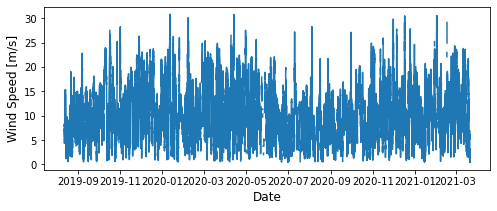

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))

ax.plot(df.index, df['wspd138m'])

ax.set_ylabel("Wind Speed [m/s]", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

plt.show()

We can see that instantaneous winds can be as strong as 30 m/s or as weak as 0 m/s. Let's smooth this time series by averaging winds every week. More information on the `pandas` resample function can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html).

In [28]:
weekly_winds = df.resample("W").mean() # note the "W" stands for 'week'

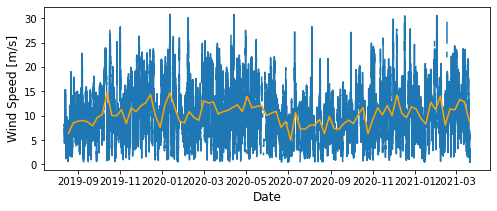

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))

ax.plot(df.index, df['wspd138m'])
ax.plot(weekly_winds.index, weekly_winds['wspd138m'], color='orange')

ax.set_ylabel("Wind Speed [m/s]", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

plt.show()

### Bonus: Adding a new column to your Dataframe

What if we want to add a column of the average windspeed at all altitudes? It only requires 1 line of code!

In [30]:
df['avg_wspd'] = df.mean(axis = 1)

In [31]:
df

,wspd18m,wspd38m,wspd58m,wspd78m,wspd98m,wspd118m,wspd138m,wspd158m,wspd178m,wspd198m,avg_wspd
timestamp,,,,,,,,,,,
2019-08-12 00:00:00,7.2923,7.6785,7.6968,7.8280,7.8013,7.8933,7.8635,7.8858,7.9044,NaN,7.760433
2019-08-12 00:10:00,7.8613,8.0330,8.0225,7.9279,7.9980,7.9306,8.1698,8.1405,8.0702,8.0487,8.020250
2019-08-12 00:20:00,7.7594,7.9883,8.0180,8.1314,8.0906,8.1408,8.1291,8.0939,8.2030,8.1353,8.068980
2019-08-12 00:30:00,7.4891,7.7554,7.7973,7.9551,7.9063,7.9964,7.9652,8.0749,8.0105,8.0792,7.902940
2019-08-12 00:40:00,7.8829,8.0248,8.1332,8.1741,7.9927,8.1230,8.0443,8.1074,8.1969,8.1296,8.080890
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-21 23:10:00,1.7978,1.9557,2.0617,1.9270,1.3744,1.0722,0.9203,0.9038,0.9421,1.2546,1.420960
2021-03-21 23:20:00,2.6771,2.8746,2.8993,2.9530,2.9098,2.6337,2.1869,1.7314,1.5436,1.6571,2.406650
2021-03-21 23:30:00,3.2416,3.4077,3.5611,3.5823,3.5930,3.3885,2.9375,2.4509,2.2373,2.2883,3.068820
